In [60]:
import time
from geopy.geocoders import Nominatim

from collections import OrderedDict
import operator

from geopy.exc import GeocoderTimedOut

import matplotlib.pyplot as plt

import csv

# Create A GeoLocator Object

In [61]:
geolocator = Nominatim(user_agent="Abdullah_Alfarrarjeh_app")

# Cutomized Reverse Geocoding Function to avoid A "Time-out" Exception

In [62]:
def do_reverse_geocode(address):
    try:
        return geolocator.reverse(address)
    except GeocoderTimedOut:
        return do_reverse_geocode(address)

# Reverse Geocoding and Calculate "County" Count

In [54]:
count = 0
         
f_input= open("tweet_input.csv",encoding="utf8")

final_dictionary = {}

lines = [x.strip() for x in f_input.readlines()]
for line in lines:
    count+=1
    
    #first line is a headerline. Skip intentionally.
    if count == 1:    
        continue
    
    lineTokens = line.split(',')
    latitude = lineTokens[3]
    longitude = lineTokens[4]
    
    location = do_reverse_geocode(latitude + "," + longitude)
    
    county = location.raw['address']['county']   
    print(latitude + "\t" + longitude + "\t" + county)
    
    if county not in final_dictionary:
        final_dictionary[county] = 1
    else:
        final_dictionary[county] = final_dictionary[county] + 1
                    
    # Wait for 300 milliseconds
    time.sleep(0.300)
    
sorted_d = sorted(final_dictionary.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_d)

f_input.close()

38.28426382	-122.4487911	Sonoma County
37.79241348	-122.410493	SF
38.45771909	-122.4213988	Napa County
37.38006555	-122.0616235	Santa Clara County
37.70389661	-122.4169237	San Mateo County
37.8623652	-122.2776915	Alameda County
37.8355046	-122.212054	Alameda County
37.77337331	-122.4122145	SF
37.7109384	-122.2160469	Alameda County
38.01468934	-122.0853694	Contra Costa County
37.7990796	-121.3099554	San Joaquin County
38.3350089	-122.3257433	Napa County
37.54892903	-121.9691475	Alameda County
38.65452715	-121.3235724	Sacramento County
37.46194636	-122.4283357	San Mateo County
37.42564948	-121.8814992	Santa Clara County
38.57624071	-121.5336279	Yolo County
37.47090875	-121.1422308	Stanislaus County
37.79654251	-121.8964663	Contra Costa County
37.7990796	-121.3099554	San Joaquin County
38.00406635	-121.2752641	San Joaquin County
37.72546803	-122.405785	SF
38.05446248	-121.3928586	San Joaquin County
37.56832411	-122.3162052	San Mateo County
38.7207651	-121.4102772	Sacramento County
38.0377

# Save Country Count into a CSV File

In [59]:
with open('GeoRegionCount.csv', mode='w', newline = '', encoding='UTF-8') as my_file:
    my_writer = csv.writer(my_file, delimiter=',')
    
    my_writer.writerow(['GeoRegion', 'Count'])
    
    for key in sorted_d:
        current_RegionName = str(key[0])
        current_Count = int(key[1])
        
        my_writer.writerow([current_RegionName, current_Count])

# Plot a Histogram of County Count

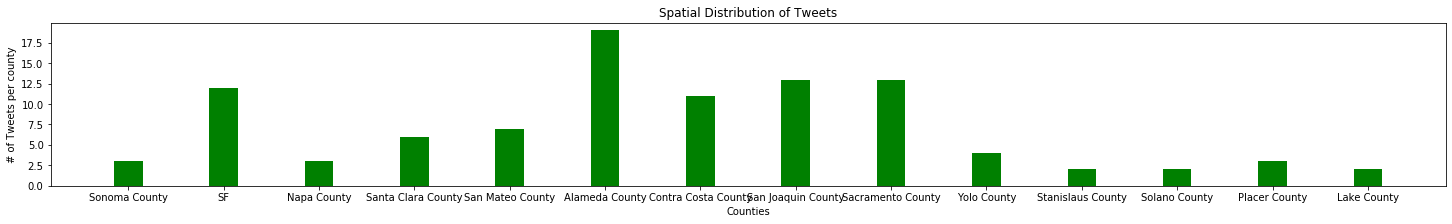

In [58]:
plt.figure(figsize=(25, 3))
plt.title('Spatial Distribution of Tweets')
plt.xlabel('Counties')
plt.ylabel('# of Tweets per county')
plt.bar(final_dictionary.keys(), final_dictionary.values(), width=0.3, color='g')

plt.show()